# CPU Scheduling
## วสุธันย์ กิติจีราพัฒน์
## 600610773


In [1]:
import processes
import algorithm
import record

import inspect
import matplotlib.pyplot as plt
%matplotlib inline


# Scheduling Algorithm 

## First Come First Served Scheduling
คือมาก่อนได้ก่อน จะไม่มีการแทรกแซงงานอื่น (nonpreemtive) จัดเป็นวิธีที่ง่ายที่สุด แต่ว่าถ้ามี process นึงมาถึงก่อน แต่ทำงานนาน จะทำให้ process อื่นๆที่มารอ ต้องคอยนานตามไปด้วย ส่งผลให้ค่า Waiting time สูงไปด้วย 


In [2]:
print(inspect.getsource(algorithm.FCFS))

def FCFS(process_list):
  """First come first search"""

  history = [0]
  record = _create_record(process_list)

  for process in process_list:
    used_time = history[-1] + process.exe_time
    record[process.pid].waiting_time = history[-1]
    record[process.pid].turnaround_time = used_time
    history.append(used_time)

  return history, record



## Shortest Job First Scheduling
หลักการคือ จะให้งานที่จะใช้เวลาน้อยที่สุดทำงาน ถ้ามีงานมาถึงพร้อมกัน งานที่ใช้เวลาน้อยกว่าก็จะได้ทำก่อน การทำแบบนี้ทำให้ waiting time มีค่าน้อยกว่าแบบ FCFS มาก ค่าของ turn around time ก็น้อยกว่า เพราะไม่ต้องรอนาน แต่ข้อเสียคือ CPU ไม่มีทางรู้อนาคตว่างานที่มาจะใช้เวลาทำเท่าไหร่ ทำให้ SJF ใช้งา

In [3]:
print(inspect.getsource(algorithm.SJF))

def SJF(process_list):

  record = _create_record(process_list)

  # priority of this algorithm is time of process
  sorted_processes = sorted(process_list, key=lambda x: x.exe_time)

  history = [0]
  for process in sorted_processes:
    used_time = history[-1] + process.exe_time
    record[process.pid].waiting_time = history[-1]
    record[process.pid].turnaround_time = used_time
    history.append(used_time)

  return history, record



## Round Robin Scheduling
วิธีการนี้คือกำหนดให้ process ทำงานเป็นรอบ ๆ โดยจะกำหนดเวลาที่เท่าเทียมขึ้นมา เรียกว่า Quantum time โดย process ที่จะเข้าไปทำงาน จะทำงานแค่เวลาที่กำหนด ใครทำไม่เสร็จก็ออกมาต่อแถวแล้วทำต่อ ส่วน process ไหนใช้เวลาน้อยกว่า Quantum time ก็จะไม่ต้องไปต่อแถวอีก ซึ่งเหมาะกับ CPU มีงานเข้ามาจำนวนมาก สิ่งสำคัญของ round robin คือ Quantum time ซึ่งหากกำหนดมากเกินไปก็จะไม่ต่างกับ FCFS โดยทั่วไปจะมีค่า ประมาณ 10 – 100 ms 

In [4]:
print(inspect.getsource(algorithm.RR))

def RR(process_list, quantum_time=10):
  record = _create_record(process_list)
  process_queue = process_list.copy()
  history = [0]

  for process in process_queue:
    if process.exe_time_left <= quantum_time:
      use_time = history[-1] + process.exe_time_left
      record[process.pid].waiting_time = history[-1] - process.exe_time + process.exe_time_left
      record[process.pid].turnaround_time = use_time
      history.append(use_time)
    else:
      time_process_left = process.exe_time_left - quantum_time
      process.exe_time_left = time_process_left
      # Push same process in queue
      process_queue.append(process)
      use_time = history[-1] + quantum_time
      history.append(use_time)

  return history, record



# Experimential Result

## สมมติฐานที่ 1 
จัดคิวจำนวน 60 processes ใช้เวลา (2 ถึง 8 milisec) จำนวน 70 %, Processes ที่ใช้เวลา (20 ถึง 30 milisec) จำนวน 20 %  , Processes ที่ใช้เวลา (35 ถึง 40 milisec) จำนวน 10 %  

In [5]:
rand_cond = processes.RamdomCondition()
rand_cond.add_condition((2, 8), 70)
rand_cond.add_condition((20, 30), 20)
rand_cond.add_condition((35, 40), 10)

process_list = processes.process_generate(rand_cond, 60)
print(process_list)


[4, 2, 30, 5, 2, 3, 20, 5, 25, 6, 4, 20, 6, 25, 26, 2, 2, 5, 2, 24, 3, 8, 4, 3, 40, 7, 6, 7, 2, 27, 4, 8, 39, 8, 27, 7, 5, 6, 4, 38, 5, 4, 8, 37, 4, 7, 2, 36, 7, 6, 24, 8, 36, 7, 6, 5, 29, 8, 28, 6]


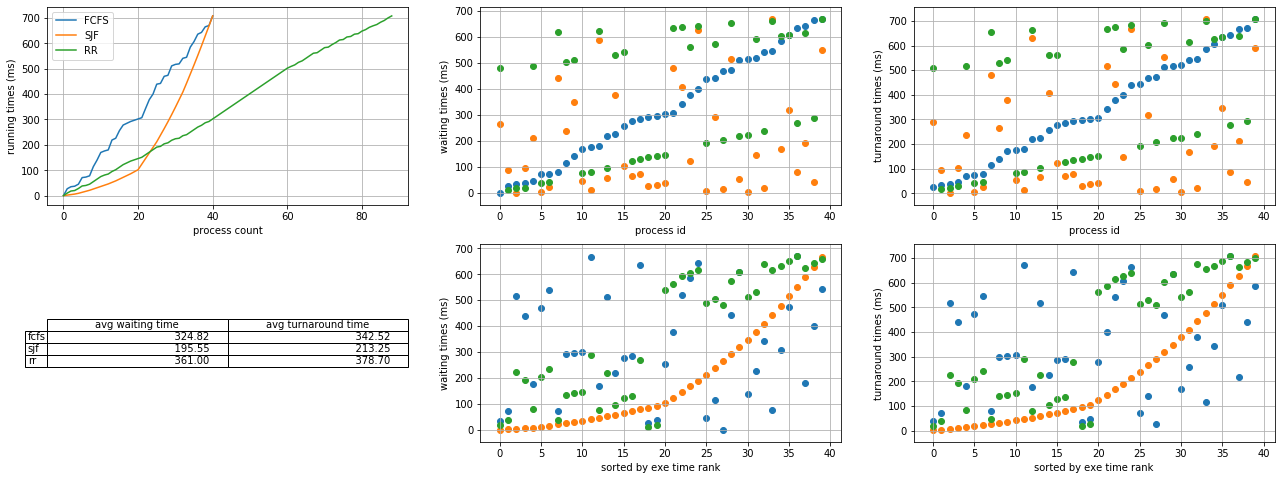

In [8]:
record.render_simulation(process_list)

## สมมติฐานที่ 2
จัดคิวจำนวน 40 processes ทำการสุ่ม processes ใช้เวลา (2 ถึง 8 milisec) จำนวน 50 %, Processes ที่ใช้เวลา (20 ถึง 30 milisec) จำนวน 30 %  , Processes ที่ใช้เวลา (35 ถึง 40 milisec) จำนวน 20 % 

In [9]:
rand_cond = processes.RamdomCondition()
rand_cond.add_condition((2, 8), 50)
rand_cond.add_condition((20, 30), 30)
rand_cond.add_condition((35, 40), 20)

process_list = processes.process_generate(rand_cond, 40)
print(process_list)

[3, 7, 26, 6, 7, 40, 37, 2, 26, 37, 23, 35, 8, 8, 4, 21, 25, 4, 38, 5, 7, 20, 4, 5, 25, 30, 7, 6, 30, 2, 22, 4, 39, 4, 5, 20, 4, 37, 30, 36]


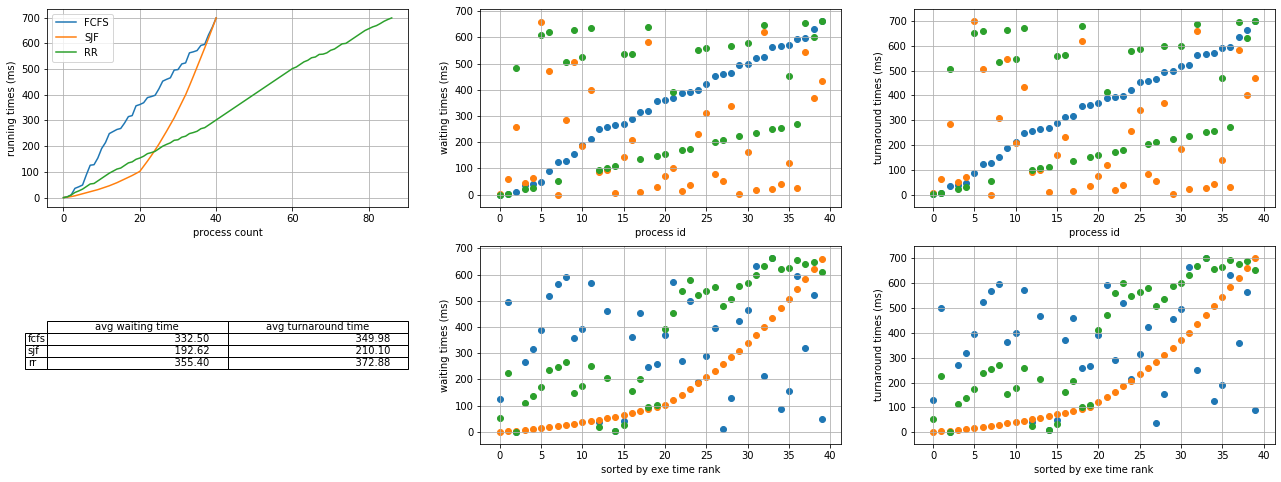

In [10]:
record.render_simulation(process_list)

## สมมติฐานที่ 3
จัดคิวจำนวน 20 processes สุ่ม Processes ที่ใช้เวลา (2 ถึง 8 milisec) จำนวน 40 %, Processes ใช้เวลา (20 ถึง 30 milisec) จำนวน 40 %  , Processesใช้เวลา (35 ถึง 40 milisec) จำนวน 20 % 

In [11]:
rand_cond = processes.RamdomCondition()
rand_cond.add_condition((2, 8), 40)
rand_cond.add_condition((20, 30), 40)
rand_cond.add_condition((35, 40), 20)

process_list = processes.process_generate(rand_cond, 20)
print(process_list)

[39, 2, 8, 37, 20, 24, 2, 38, 5, 3, 8, 38, 20, 22, 20, 25, 29, 27, 5, 7]


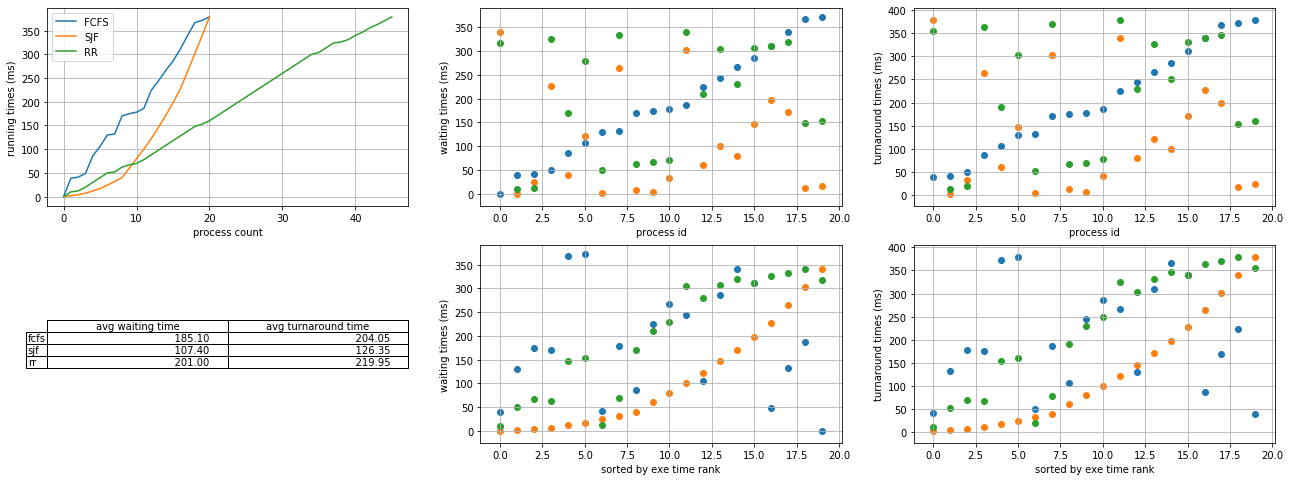

In [12]:
record.render_simulation(process_list)

## Conclusion

ข้อดีของ First Come First Served (FCFS) เป็นวิธีที่ง่ายที่สุด แต่ถ้า Process แรกๆ ทำงานช้า Process อื่นก็จะต้องรอให้ทำงานเสร็จก่อน ทำให้มี process มาต่อกันเพื่อรอมากขึ้น ส่วน Shortest-Job-First (SJF) เป็นวิธีที่ใช้เวลาน้อยที่สุด แต่ในความเป็นจริงไม่สามารถนำมาใช้งานได้ เพราะว่า CPU ไม่สามารถรู้เวลาของ process ที่เข้ามา ส่วน Round Robin (RR) จะทำงานตามค่า Quantum time 10 ms ถ้า process ไหนมีเวลาน้อยกว่าค่า Quantum time ก็ไม่ต้องมาต่อแถวรอทำงานอีก ข้อเสียคือถ้าตั้งค่า Quantum time มากเกินไปการทำงานก็จะเหมือนกับ First Come First Served (FCFS)

Source code: https://github.com/mrkwskiti/cpu-scheduling